In [1]:
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Projet house prices

## data

### Etape 1 : Recuperer la base de donnée train.csv

### Créer un notebook avec un titre et importer train.csv dans un dataframe

In [2]:
url="https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/bdfc59ed-c3c7-48ac-a3d3-9e54663f6c1d.csv"
train = pd.read_csv(url)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Etape 2 : Comprendre la signification de chaque colonne

In [3]:
# chaque ligne du datfarme représente une propriété (maison)

train.shape

(1460, 81)

In [4]:
# je remarque que le dataframe contient de nombreuse valeur manquant

#train.info()

In [5]:
# je me rend compte que j'ai 6965 valeurs Nan dans mon dataframe

sum(train.isna().sum())

6965

In [6]:
train.MasVnrArea.isnull().sum()

8

In [7]:
# jAvec le code ci dessous je remplace les valeurs Nan

for name in train.columns:
    x = train[name].isna().sum()
    if x > 0:
        val_list = np.random.choice(train.groupby(name).count().index, x, p=train.groupby(name).count()['Id'].values /sum(train.groupby(name).count()['Id'].values))
        train.loc[train[name].isna(), name] = val_list

In [8]:
# plus de valeur nan a présent

sum(train.isna().sum())

0

In [9]:
train.MasVnrArea.isna().sum()

0

In [10]:
train.MasVnrArea.isnull().sum()

0

In [11]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Fa,GdWo,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Fa,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Fa,GdPrv,Shed,0,4,2010,WD,Normal,142125


In [12]:
#train.describe()

In [13]:
# je cherche les corrélations entre mes variable avec comme target Sale Price
#train.corr()

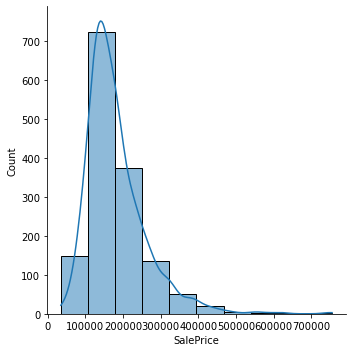

In [14]:
# je regarde la distribution de al colonne prix des maison
sns.displot(train.SalePrice, kde=True, bins=10)

### Target

In [15]:
# SalePrice:  le prix de vente de la propriété en dollars

In [16]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Features

In [17]:
# OverallQual ==> Qualifé globale
# YearRemodAdd ==> année de rénovation
# MasVnrArea ==> taille de l'appartement au m2

In [18]:
train_2 = train[['SalePrice', 'OverallQual', 'YearRemodAdd', 'MasVnrArea']]
train_2

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
0,208500,7,2003,196.0
1,181500,6,1976,0.0
2,223500,7,2002,162.0
3,140000,7,1970,0.0
4,250000,8,2000,350.0
...,...,...,...,...
1455,175000,6,2000,0.0
1456,210000,6,1988,119.0
1457,266500,7,2006,0.0
1458,142125,5,1996,0.0


In [19]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1460 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


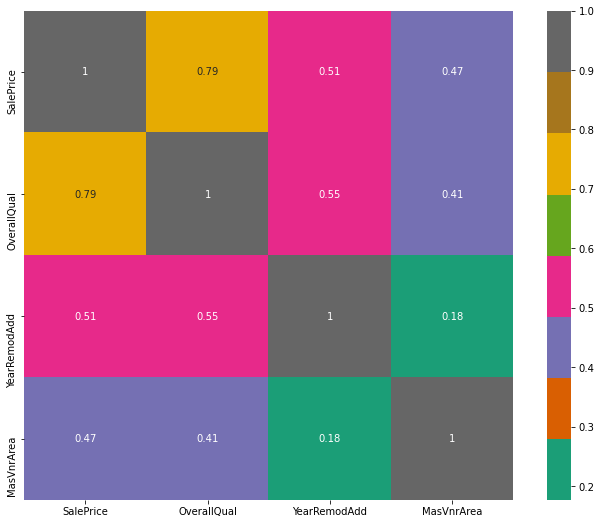

In [20]:
corrmat = train_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, cmap="Dark2");

On se rend compte que les features qui impact le plus notre target qui est le prix de vente des propriétes semble cohérentes:
la taille des proprietes
la qualite des proriete
l'annee de rénovation

dans une second partie peut etre pourrront nous regarder par quartier 


## model: y = ax + b

### Faites une regression lineaire avec une feature. Choisir une feature qui n'a pas besoin d'être transformée

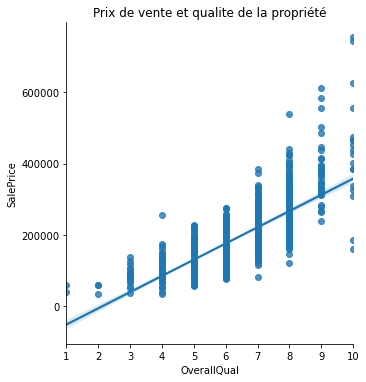

In [21]:
sns.lmplot(x="OverallQual", y="SalePrice", data=train_2).set(title='Prix de vente et qualite de la propriété')

In [22]:
# je remplace les lignes ayant 0 comme valeur avec la moyenne des superficies

train_2['MasVnrArea']=train_2['MasVnrArea'].replace(0.0,train_2['MasVnrArea'].mean())

<ipython-input-22-0483291a5526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2['MasVnrArea']=train_2['MasVnrArea'].replace(0.0,train_2['MasVnrArea'].mean())


In [23]:
#train_2

###  Faites une regression lineaire avec Stats model et interpreter les résultats.

In [24]:
mod = smf.ols(formula='SalePrice ~ OverallQual + MasVnrArea', data=train_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        15:12:41   Log-Likelihood:                -17766.
No. Observations:                1460   AIC:                         3.554e+04
Df Residuals:                    1457   BIC:                         3.555e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -8.89e+04   5560.212    -15.989      0.000   -9.98e+04    -7.8e+04
OverallQual  4.159e+04    946.674     43.929      0.000    3.97e+04    4.34e+04
MasVnrArea     98.3112      8.717     11.278      0.000      81.212     115.410
==============================================================================
Omnibus:                      489.172   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4866.414
Skew:                           1.266   Prob(JB):                         0.00
Kurtosis:                      11.578   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# observation:
# R carré a 0,656 acceptable mais pas optimal
# mes p values sont bonne étant a 0

In [26]:
# j'affiche le coef des parametres de mon model

print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  Intercept     -88901.648930
OverallQual    41586.441522
MasVnrArea        98.311187
dtype: float64
R2:  0.6557097414735211


### création d'un programme de prédiction d'une fourchette de prix de la propriété

In [27]:
# je multiplie mes coef avec les valeur de mon dataframe pour l'exemple  id 0

result = res.params['OverallQual']*7 + res.params['MasVnrArea']*196 + res.params['Intercept']
print(f' Le prix de la propriete de l id 0 {result}')

 Le prix de la propriete de l id 0 221472.43429997566


In [28]:
def prediction_mpg(OverallQual, MasVnrArea):
    result = res.params['OverallQual']*OverallQual + res.params['MasVnrArea']*MasVnrArea + res.params['Intercept']
    result_min = round((res.rsquared * result) ,2)
    result_max = round(((1 - res.rsquared) * result + result),2)
    return f'cette propriété sera vendu entre {result_min} et {result_max} selon notre model' 

In [29]:
print(prediction_mpg(OverallQual=6, MasVnrArea=119.000000))


cette propriété sera vendu entre 112989.3 et 231642.76 selon notre model


### Etape 7 : Faites une regression lineaire avec sklearn et interpreter les les résultats

In [30]:
X = train_2[['OverallQual', 'MasVnrArea']]
y = train_2.SalePrice

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6557097414735212

In [31]:
# j'affiche mon intercept

reg.intercept_

-88901.64893030949

### Etape 8 (Objectif) : Réaliser une prediction avec sklearn

In [32]:
# je predis sur l'id 0 pour tester

pred_OverallQual = 7
pred_MasVnrArea = 196.0
reg.predict([[pred_OverallQual, pred_OverallQual]])

print(f" la valeur du prix de la propriété avec l'id 0 est dans mon dataframe de 208500$")
print(f" Avec ma prediction sklearn le prix est de {reg.predict([[pred_OverallQual, pred_OverallQual]])} $")

 la valeur du prix de la propriété avec l'id 0 est dans mon dataframe de 208500$
 Avec ma prediction sklearn le prix est de [202891.6200293] $


### Optionnel level 1 : Separer les données d'entrainement et données de test (test.csv)

In [33]:
url2 = 'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/cec15e86-18ba-4e4e-bcda-0c113450891d.csv'
test = pd.read_csv(url)
#test

In [60]:
test_2 = test[['SalePrice', 'OverallQual', 'YearRemodAdd', 'MasVnrArea']]

In [35]:
test_2['MasVnrArea']=test_2['MasVnrArea'].replace(0.0,test_2['MasVnrArea'].mean())

<ipython-input-35-5cd01af8d7bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2['MasVnrArea']=test_2['MasVnrArea'].replace(0.0,test_2['MasVnrArea'].mean())


In [61]:
test_2

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
0,208500,7,2003,196.0
1,181500,6,1976,0.0
2,223500,7,2002,162.0
3,140000,7,1970,0.0
4,250000,8,2000,350.0
...,...,...,...,...
1455,175000,6,2000,0.0
1456,210000,6,1988,119.0
1457,266500,7,2006,0.0
1458,142125,5,1996,0.0


In [59]:
#test_2.info()

In [38]:
test_2.MasVnrArea = test_2.fillna(value=test_2['MasVnrArea'].mean())

/Users/marinelafargue/anaconda3/envs/ecology_project/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1460 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
# create x and y
feature_cols = ['MasVnrArea', 'OverallQual']
x2 = test_2[feature_cols] # predictor
y2 = test_2.SalePrice # response

In [42]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x2, y2, test_size=0.2) 
# the test set will be 20% of the whole data set

In [49]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg.score(x_train,y_train)


1.0

In [52]:
print(linreg.intercept_)


-2.3283064365386963e-10


In [54]:
coeff_df = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,1.000000e+00
MasVnrArea,-1.824337e-13
